# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 6: Regression Analysis

### Goals 

- To learn how to use perform linear regression by least squares using Python and scikit-learn.
- To appreciate that the same linear regression coefficients may be the best fit for dramatically different data distributions -- as illustrated by the Anscombe's quartet.
- To practice with different types of regularization (*lasso* and *ridge*) and understand when to use them.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets.
- To increase our statistical analysis skills.

### Instructions

- This assignment is structured in 4 parts.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss

-------------------
## Part 1: Linear regression by least squares

In this part, we will take another look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the *illiteracy* rate.

The Python code below plots the fertility versus illiteracy and computes the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

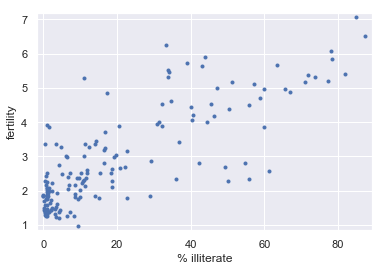

Pearson correlation coefficient between illiteracy and fertility: 0.80413


In [2]:
df = pd.read_csv('data/female_literacy_fertility.csv')

illiteracy = 100 - df['female literacy']

fertility = df['fertility']

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('% illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print('Pearson correlation coefficient between illiteracy and fertility: {:.5f}'.format(pearson_r(illiteracy, fertility)))

We will assume that fertility is a linear function of the female illiteracy rate: `f=ai+b`, where `a` is the slope and `b` is the intercept. 

We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. 

The slope tells us how the fertility rate varies with illiteracy. 
We can find the best fit line .

### Write code to plot the data and the best fit line (using `np.polyfit()`) and print out the slope and intercept.

## Solution

Line of best fit function:  
0.0498 x + 1.888

Using np.polyfit:
Slope: 0.049799		Intercept: 1.888051

Using ss.linregress:
Slope: 0.049799		Intercept: 1.888051


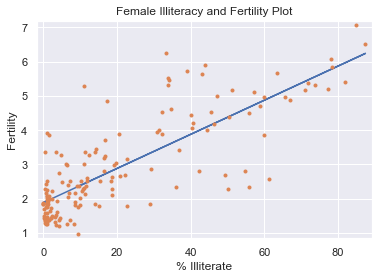

In [3]:
# Write code to plot the data and the best fit line (using np.polyfit()) 
# and print out the slope and intercept

                        # Line of Best Fit #
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html
poly_coefficients = np.polyfit(x = illiteracy, y = fertility, deg = 1)
poly1d_function = np.poly1d(poly_coefficients)
print("Line of best fit function:", poly1d_function)

                        # Slope and Intercept #
print("\nUsing np.polyfit:")
print("Slope: %f\t\tIntercept: %f" % (poly_coefficients[0], poly_coefficients[1]))

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
print("\nUsing ss.linregress:")
slope, intercept, r_value, p_value, std_err = ss.linregress(illiteracy, fertility)
print("Slope: %f\t\tIntercept: %f" % (slope, intercept))

                        # Plotting #
# Plot line of best fit
_ = plt.plot(illiteracy, poly1d_function(illiteracy));

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('% Illiterate')
_ = plt.ylabel('Fertility')
_ = plt.title("Female Illiteracy and Fertility Plot")

# Show the plot
plt.show();

The function `np.polyfit()` that you used above to get your regression parameters finds the optimal slope and intercept. It is optimizing the the _residual sum of squares (RSS)_, also known as the _sum of squared residuals (SSR)_ or the _sum of squared estimate of errors (SSE)_, which can be defined as "the sum of the squares of residuals (deviations predicted from actual empirical values of data)." (see https://en.wikipedia.org/wiki/Residual_sum_of_squares)

### Write code to plot the function that is being optimized, the RSS, versus the slope parameter `a`. To do this, fix the intercept (`b`) to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

Hint: use a `for` loop to draw 100,000 permutation replicates and compute the Pearson correlation coefficient for each of them. (Vinh = ?????!!!)

Your plot will probably look like this:
![data/plot.png](data/plot.png)

## Solution

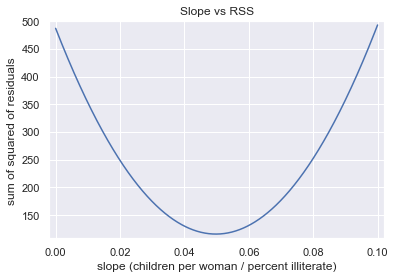

The minimum is around 0.05


In [4]:
# Write code to plot the function that is being optimized, the RSS, versus the slope parameter a

# Fix the intercept (b) to be what you found in the optimization
optimized_intercept = poly_coefficients[1]

# Around 1000 is fine (don't need 100000 )
count =  1000
a = np.linspace(0, 0.1, count)
rss = np.empty(count)

for x in range(count): 
    # Predict value from the model 
    model_predicted = a[x] * illiteracy + optimized_intercept
    
    # Sum of squared residuals (SSR): actual - predicted
    rss[x] = np.sum(np.square(fertility - model_predicted))


# Plot the Slope vs RSS
RSS_plot = plt.plot(a, rss)

# Set the margins and label axes
plt.margins(0.02)
RSS_plot = plt.xlabel('slope (children per woman / percent illiterate)')
RSS_plot = plt.ylabel('sum of squared of residuals ')
RSS_plot = plt.title("Slope vs RSS")

# Show the plot
plt.show();

# Mininal in the plot 
print("The minimum is around 0.05")

-------------------
## Part 2: Anscombe's quartet

The Anscombe's quartet is a collection of four small data sets that have nearly identical simple descriptive statistics, yet have very different distributions. Each dataset consists of 11 `(x,y)` points. The quartet was created in 1973 by the statistician Francis Anscombe to demonstrate: the importance of visualization and exploratory data analysis (EDA), the effect of outliers and other influential observations on statistical properties, and the limitations of summary statistics (\*).

(\*) See https://heap.io/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story if you're interested.

![data/Anscombes_Quartet.png](data/Anscombes_Quartet.png) 

The Python code below performs a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [5]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

slope = 0.5000909090909095
intercept = 3.0000909090909076


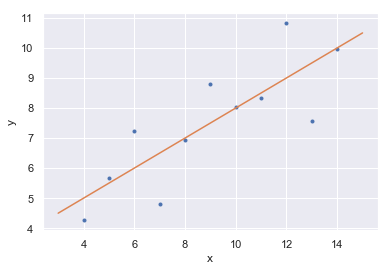

In [6]:
# Perform linear regression: a, b
a, b = np.polyfit(x1, y1, 1)

# Print the slope and intercept
print('slope =', a)
print('intercept =', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

## Linear regression on all Anscombe data

### Write code to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, i.e. compute the slope and intercept for each set. 

The data are stored in lists (`anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`), corresponding to the $x$ and $y$ values for each Anscombe data set.

## Solution

In [7]:
# Write code to verify that all four of the Anscombe data sets have the same slope and 
# intercept from a linear regression, i.e. compute the slope and intercept for each set.

anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

for i in range(4):
    # Perform linear regression: a, b
    a, b = np.polyfit(anscombe_x[i], anscombe_y[i], 1)
        
    # Print the slope and intercept
    print("x%d, y%d:" % (i+1,i+1))
    print('\tslope =', a, '\tintercept =', b)

x1, y1:
	slope = 0.5000909090909095 	intercept = 3.0000909090909076
x2, y2:
	slope = 0.5000000000000004 	intercept = 3.000909090909089
x3, y3:
	slope = 0.4997272727272731 	intercept = 3.0024545454545453
x4, y4:
	slope = 0.49990909090909064 	intercept = 3.0017272727272735


-------------------
## Part 3: Regression using scikit-learn

Now that we know the basics of linear regression, we will switch to scikit-learn, a powerful, workflow-oriented library for data science and machine learning.

The Python code below shows a simple linear regression example using scikit-learn. Note the use of the `fit()` and `predict()` methods.

[2.9776566]
-1.903310725531119


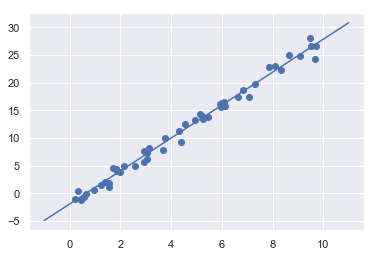

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data around the y = ax+b line where a=3 and b=-2
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 3 * x - 2 + rng.randn(50)

from sklearn.linear_model import LinearRegression

# Note: If you get a "ModuleNotFoundError: No module named 'sklearn'" error message, don't panic.
# It probably means you'll have to install the module by hand if you're using pip. 
# If you're using conda, you should not see any error message.

model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]
X.shape

model.fit(X, y)
print(model.coef_)
print(model.intercept_)

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Polynomial regression

One way to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take the multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

The code below shows a simple example of polynomial regression using the ``PolynomialFeatures`` transformer in scikit-learn. Concretely, it shows how we can use polynomial features with a polynomial of degree seven, i.e. $$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_7 x^7$$ 

It also introduces the notion of a *pipeline* in scikit-learn. "The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters." (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) 

The R^2 score for the fit is:  0.9806993128749502


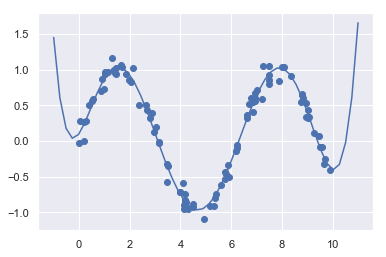

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

print('The R^2 score for the fit is: ', poly_model.score(x[:, np.newaxis], y))

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### Questions 1-3

1. Which mathematical function was used to simulate the data points (with a bit of random noise around them)? 
2. Which degree/order was used for the polynomial basis functions?
3. How good was the linear model fit to the non-linear data?


## Solution

1. The mathematical function was used to simulate the data points (with a bit of random noise around them) is rand() from class RandomState() (https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.RandomState.html).
2. The degree/order was used for the polynomial basis functions is 7 (PolynomialFeatures(7)).
3. Through the use of basis functions, the linear model is pretty good fit to the non-linear data.

### Write code to find the best degree/order for the polynomial basis functions (between 1 and 15) by computing the quality of the fit using a suitable metric, in this case the $R^2$ coefficient (which can be computer using the `score()` function). 

Remember that **the best possible score is 1.0**. The score can be negative (because the model can be arbitrarily worse). A score of 0 suggests a constant model that always predicts the expected value of y, disregarding the input features.

Hint: If you plot the score against the degree/order of the polynomial, you should see something like this:

![data/download.png](data/download.png)

## Solution

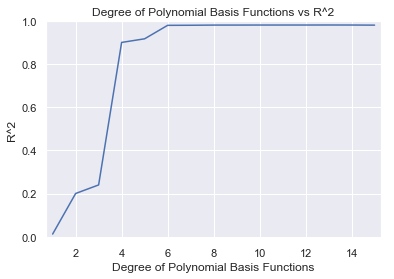

 Degree       R^2
      1  0.012172
      2  0.200413
      3  0.240103
      4  0.901095
      5  0.917898
      6  0.980355
      7  0.980699
      8  0.981540
      9  0.981556
     10  0.981755
     11  0.981759
     12  0.981763
     13  0.981942
     14  0.981771
     15  0.981292


In [10]:
# Write code to find the best degree/order for the polynomial basis functions (between 1 and 15) 

degrees = np.arange(1, 16, 1)
count = degrees.shape[0]
scores = np.empty(count)

# for loop to compute the R^2 from different degree of the basis functions
for i in range(count):
    poly_model = make_pipeline(PolynomialFeatures(degrees[i]),LinearRegression())

    rng = np.random.RandomState(1)
    x = 10 * rng.rand(100)
    y = np.sin(x) + 0.1 * rng.randn(100)

    poly_model.fit(x[:, np.newaxis], y)
    yfit = poly_model.predict(xfit[:, np.newaxis])
    
    # Stores the R^2 score
    scores[i] = poly_model.score(x[:, np.newaxis], y)

# Plot the degree of polynomial basis functions vs R^2
R2_plot = plt.plot(degrees, scores)

# Set the margins and label axes
plt.margins(0.02)
R2_plot = plt.xlabel('Degree of Polynomial Basis Functions')
R2_plot = plt.ylabel('R^2')
R2_plot = plt.title("Degree of Polynomial Basis Functions vs R^2")

# Show the plot
plt.show();

# Print the scores
degree_R2 = pd.DataFrame({'Degree': degrees, 'R^2': scores }, columns=['Degree', 'R^2'])
print(degree_R2.to_string(index=False))

### Questions 4-6

4. Which degree/order polynomial produced the best fit (i.e., highest $R^2$ score)? 
5. Would you consider using the resulting polynomial as your model? Why (not)?
6. If you answered 'no' to question 5 (as you should!), which degree would you choose for your polynomial regression model?


## Solution

4. The degree/order polynomial produced the best fit (i.e., highest  𝑅2  score) is degree 13 with the R^2 scores of 0.981942
5. I would "not" consider using the resulting polynomial as my model because it is overfiting and unnecessary complex.
6. The degree that I would choose for my polynomial regression model would be 6 since there is not that much difference in R^2 scores from polymonial degree 6 to degree 15 so choose the smallest out of them would be better.

## Part 4: Regularization

The use of polynomial regression with high-order polynomials can very quickly lead to over-fitting. In this part, we will look into the use of regularization to address potential overfitting.

The code below shows an attempt to fit a 15th degree polynomial to a sinusoidal shaped data. The fit is excellent ($R^2$ > 0.98), but might raise suspicions that it will lead to overfitting.

0.9812918693173667


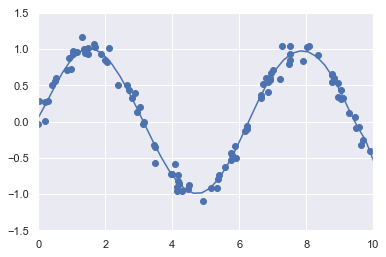

In [11]:
model = make_pipeline(PolynomialFeatures(15),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = model.score(x[:, np.newaxis], y)
print(score)

### Write Python code to perform Ridge regression ($L_2$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator. 
2. In the beginning, use all default values for its parameters.
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

## Solution

0.9789093227509013


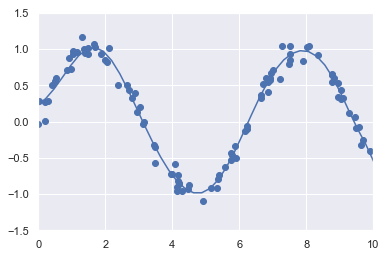

In [12]:
# Write Python code to perform Ridge regression (𝐿2  Regularization), 
# plot the resulting fit, and compute the 𝑅2  score.

                            # Default values for Ridge paramters #
    
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge

model = make_pipeline(PolynomialFeatures(15), Ridge())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = model.score(x[:, np.newaxis], y)
print(score)

In [13]:
# Ignore Python warnings
import warnings
warnings.filterwarnings('ignore')

# Method for printing the best R2 
def bestR2(testPara_rangeValues, testPara_Name, scores):
    
     # Convert to Df and find the value of alpha for the largest R^2
    df_result = pd.DataFrame({testPara_Name: testPara_rangeValues, 'R^2': scores}, 
                                 columns=[testPara_Name, 'R^2'])
    best_result = df_result.loc[df_result['R^2'].idxmax()]

    print("Print out the head() of dataframe:\n", df_result.head(), "\n")
    print("Scores for best result:\n",best_result)
    
    return best_result

In [14]:
                                # Fine-tune the model #
# alpha = Regularization strength; must be a positive float. Regularization improves
# the conditioning of the problem and reduces the variance of the estimates

alphas = np.arange(0.00, 10, 0.01)
count = alphas.shape[0]
scores = np.empty(count)

for i in range(count):
    model = make_pipeline(PolynomialFeatures(15), Ridge(alpha = alphas[i]))
    model.fit(x[:, np.newaxis], y)

    scores[i] = model.score(x[:, np.newaxis], y)
    
alpha_result = bestR2(alphas, "Alpha", scores);

Print out the head() of dataframe:
    Alpha       R^2
0   0.00  0.981882
1   0.01  0.981669
2   0.02  0.981646
3   0.03  0.981623
4   0.04  0.981596 

Scores for best result:
 Alpha    0.000000
R^2      0.981882
Name: 0, dtype: float64


In [15]:
# tol : Precision of the solution

tols = np.arange(0.000, 1, 0.001)
count = tols.shape[0]
scores = np.empty(count)

for i in range(count):
    model = make_pipeline(PolynomialFeatures(15), 
                          Ridge(alpha = alpha_result["Alpha"], tol= tols[i]))
    model.fit(x[:, np.newaxis], y)

    scores[i] = model.score(x[:, np.newaxis], y)
    
tols_result = bestR2(tols, "Tols", scores);

Print out the head() of dataframe:
     Tols       R^2
0  0.000  0.981882
1  0.001  0.981882
2  0.002  0.981882
3  0.003  0.981882
4  0.004  0.981882 

Scores for best result:
 Tols    0.000000
R^2     0.981882
Name: 0, dtype: float64


In [16]:
# solver: Solver to use in the computational routines

solvers = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
count = len(solvers)
scores = np.empty(count)

for i in range(count):
    model = make_pipeline(PolynomialFeatures(15),
                          Ridge(alpha = alpha_result["Alpha"],
                                tol = tols_result["Tols"],
                                solver = solvers[i]))
    model.fit(x[:, np.newaxis], y)

    scores[i] = model.score(x[:, np.newaxis], y)
    
solver_result = bestR2(solvers, "Solver", scores);

Print out the head() of dataframe:
       Solver       R^2
0       auto  0.981882
1        svd  0.981882
2   cholesky  0.981882
3       lsqr  0.362336
4  sparse_cg  0.959739 

Scores for best result:
 Solver        auto
R^2       0.981882
Name: 0, dtype: object


In [17]:
# Result of Fine-tune Ridge Regularization
print("Best value for R^2 is: ", solver_result["R^2"])
print("\talpha parameter: ", alpha_result["Alpha"])
print("\ttols parameter: ", tols_result["Tols"])
print("\tsolver parameter: ", solver_result["Solver"])

Best value for R^2 is:  0.9818818069661602
	alpha parameter:  0.0
	tols parameter:  0.0
	solver parameter:  auto


### Write Python code to perform Lasso regression ($L_1$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Lasso`` estimator. 
2. In the beginning, use `Lasso(alpha=0.1, tol=0.2)`
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

## Solution

0.6754347956467596


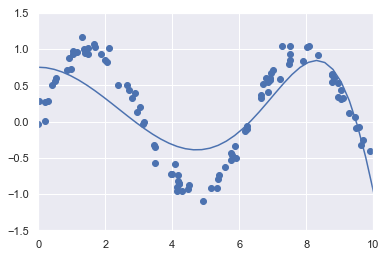

In [18]:
# Write Python code to perform Lasso regression ( 𝐿1  Regularization), 
# plot the resulting fit, and compute the  𝑅2  score.

                                # Lasso(alpha=0.1, tol=0.2) #
    
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
from sklearn.linear_model import Lasso

model = make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.1, tol=0.2))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = model.score(x[:, np.newaxis], y)
print(score)

In [19]:
                                # Fine-tune the model #
# alpha = Constant that multiplies the L1 term. Defaults to 1.0. 
# alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. 

Lasso_alphas = np.arange(0.00, 10, 0.01)
Lasso_count = Lasso_alphas.shape[0]
Lasso_scores = np.empty(Lasso_count)

for i in range(Lasso_count):
    Lasso_model = make_pipeline(PolynomialFeatures(15), Lasso(alpha = Lasso_alphas[i]))
    Lasso_model.fit(x[:, np.newaxis], y)

    Lasso_scores[i] = Lasso_model.score(x[:, np.newaxis], y)
    
Lasso_alpha_result = bestR2(Lasso_alphas, "Alpha", Lasso_scores);

Print out the head() of dataframe:
    Alpha       R^2
0   0.00  0.750180
1   0.01  0.755561
2   0.02  0.752801
3   0.03  0.751708
4   0.04  0.752292 

Scores for best result:
 Alpha    0.190000
R^2      0.756348
Name: 19, dtype: float64


In [20]:
# tol : The tolerance for the optimization: if the updates are smaller than tol,
# the optimization code checks the dual gap for optimality and continues until it is smaller than tol

Lasso_tols = np.arange(0.000, 1, 0.001)
Lasso_count = Lasso_tols.shape[0]
Lasso_scores = np.empty(Lasso_count)

for i in range(Lasso_count):
    Lasso_model = make_pipeline(PolynomialFeatures(15),
                                Lasso(alpha = Lasso_alpha_result["Alpha"], 
                                      tol= tols[i]))
    Lasso_model.fit(x[:, np.newaxis], y)

    Lasso_scores[i] = Lasso_model.score(x[:, np.newaxis], y)
    
Lasso_tols_result = bestR2(Lasso_tols, "Tols", Lasso_scores);

Print out the head() of dataframe:
     Tols       R^2
0  0.000  0.756348
1  0.001  0.756348
2  0.002  0.756348
3  0.003  0.756348
4  0.004  0.756348 

Scores for best result:
 Tols    0.000000
R^2     0.756348
Name: 0, dtype: float64


In [21]:
# Result of Fine-tune Lasso Regularization
print("Best value for R^2 is: ", Lasso_tols_result["R^2"])
print("\talpha parameter: ", Lasso_alpha_result["Alpha"])
print("\ttols parameter: ", Lasso_tols_result["Tols"])

Best value for R^2 is:  0.7563477152115996
	alpha parameter:  0.19
	tols parameter:  0.0


### Question 7

7. Which of the two regularization approaches produced a better fit (and was also the easiest to fine-tune)?


## Solution

7. The Ridge approach produced a better fit (and was also the easiest to fine-tune)

### The Boston housing dataset is a classic dataset used in linear regression examples.
(See https://scikit-learn.org/stable/datasets/index.html#boston-dataset for more)

The Python code below:
- Loads the Boston dataset (using scikit-learn's `load_boston()`) and converts it into a Pandas dataframe
- Selects two features to be used for fitting a model that will then be used to make predictions: LSTAT (% lower status of the population) and RM (average number of rooms per dwelling) (\*)
- Splits the data into train and test sets

(\*) See https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 for details.

In [22]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
boston['MEDV'] = boston_dataset.target
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Write Python code to:

1. Fit a linear model to the data.
2. Compute and print the RMSE and $R^2$ score for both train and test datasets.
3. Fit a polynomial model (of degree 4) to the data.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.
5. Apply Ridge regression to the polynomial model.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.

## Solution

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error

# Method for computing the R^2 score and RMSE
def compute_RMSE_R2(model, x, y):
    model_predicted = model.predict(x)
    RMSE = np.sqrt(mean_squared_error(y, model_predicted))
    
    R2_score = model.score(x, y)
    
    return RMSE, R2_score

# Method for printing the R^2 score and RMSE
def print_RMSE_R2(dataset, RMSE, R2):
    print("\n", dataset, ":")
    print("\tRMSE: ", np.round(RMSE, decimals=5))
    print("\tR^2 Score: ", np.round(R2, decimals=5))

In [25]:
# 1. Fit a linear model to the data.

linearModel = LinearRegression(fit_intercept=True)
linearModel.fit(X_train, y_train)
print("The model coefficient:", np.round(linearModel.coef_, decimals=5))
print("The model intercept:", np.round(linearModel.intercept_, decimals=5))

# 2. Compute and print the RMSE and  𝑅^2  score for both train and test datasets.

                    # Train dataset # 
linearModel_RMSE_train, R2_train = compute_RMSE_R2(linearModel, X_train, y_train)
print_RMSE_R2("Train dataset", linearModel_RMSE_train, R2_train)

                    # Test dataset # 
linearModel_RMSE_test, R2_test = compute_RMSE_R2(linearModel, X_test, y_test)
print_RMSE_R2("Test dataset", linearModel_RMSE_test, R2_test)

The model coefficient: [-0.71723  4.58939]
The model intercept: 2.73624

 Train dataset :
	RMSE:  5.63713
	R^2 Score:  0.63007

 Test dataset :
	RMSE:  5.1374
	R^2 Score:  0.6629


In [26]:
# 3. Fit a polynomial model (of degree 4) to the data

polyModel = make_pipeline(PolynomialFeatures(4), LinearRegression())
polyModel.fit(X_train, y_train)
print("The model coefficient:", np.round(polyModel.steps[1][1].coef_,decimals=5))
print("The model intercept:", np.round(polyModel.steps[1][1].intercept_,decimals=5))

# 4. Compute and print the RMSE and  R2 score for both train and test datasets.

                        # Train dataset # 
polyModel_RMSE_train, R2_train = compute_RMSE_R2(polyModel, X_train, y_train)
print_RMSE_R2("Train dataset", polyModel_RMSE_train, R2_train)

                        # Test dataset # 
polyModel_RMSE_test, R2_test = compute_RMSE_R2(polyModel, X_test, y_test)
print_RMSE_R2("Test dataset", polyModel_RMSE_test, R2_test)

The model coefficient: [ 0.0000000e+00 -3.1362190e+01  7.2092388e+02  1.3326300e+00
  5.8113200e+00 -2.0042324e+02 -2.6890000e-02 -1.9577000e-01
 -3.7540000e-02  2.3001170e+01  2.0000000e-04  2.0500000e-03
  5.6600000e-03 -3.0020000e-02 -9.3687000e-01]
The model intercept: -823.69808

 Train dataset :
	RMSE:  4.27608
	R^2 Score:  0.78714

 Test dataset :
	RMSE:  3.88859
	R^2 Score:  0.80687


In [27]:
# 5. Apply Ridge regression to the polynomial model.

ridgeModel = make_pipeline(PolynomialFeatures(4), Ridge())
ridgeModel.fit(X_train, y_train)
print("The model coefficient:", np.round(ridgeModel.steps[1][1].coef_,decimals=5))
print("The model intercept:",  np.round(ridgeModel.steps[1][1].intercept_,decimals=5))


# 6. Compute and print the RMSE and  𝑅2  score for both train and test datasets.

                    # Train dataset # 
ridgeModel_RMSE_train, R2_train = compute_RMSE_R2(ridgeModel, X_train, y_train)
print_RMSE_R2("Train dataset", ridgeModel_RMSE_train, R2_train)

                    # Test dataset # 
ridgeModel_RMSE_test, R2_test = compute_RMSE_R2(ridgeModel, X_test, y_test)
print_RMSE_R2("Test dataset", ridgeModel_RMSE_test, R2_test)

The model coefficient: [ 0.00000e+00 -2.22783e+00 -1.35035e+00 -9.01300e-02  7.86700e-02
 -8.07646e+00 -1.10000e-02  1.35520e-01 -1.19800e-01  1.68489e+00
  1.70000e-04 -2.00000e-04 -1.15400e-02  1.06300e-02 -9.02500e-02]
The model intercept: 90.39622

 Train dataset :
	RMSE:  4.46837
	R^2 Score:  0.76757

 Test dataset :
	RMSE:  3.91879
	R^2 Score:  0.80385
